# **Credit Card Fraud Detection**

**John Ray Martinez**   


### **Business Problem:**

Credit card fraud remains a concern for retailers and consumers everywhere. It is a huge problem globally. To put into perspective, credit card fraud is twice as large as illegal arms trafficking. [Nilson Report](https://nilsonreport.com/upload/content_promo/The_Nilson_Report_10-17-2016.pdf) reported card fraud losses equaled \\$24.71 billion in 2016, an increase of 13.14 percent over 2015. A study on EMV’s projected impact on financial fraud reports that credit card fraud losses may climb to as much as \\$31.67 billion worldwide by 2020.
  
To combat credit card fraud, we can use data science to cut losses and generate business value. Machine learning can be used in the form of supervised learning to implement a model in R. This machine learning model will help us predict which transactions are fraudulent and which ones are not. Importantly, this algorithm needs a robust credit card fraud dataset to be trained on. 
  
For this assignment, however, we will only focus on the exploratory data analysis (EDA) on credit card fraud detection dataset from Kaggle. We will go through the three types of data analysis. The first one is univariate analysis which consists of identifying distribution of the features. The second is bi-variate analysis which involves looking at the correlations between variables. And the third is multivariate analysis which also involves correlation between more than two variables.

### **Understand the Data:**

The dataset is given in the CSV format and available for download at [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). This has been collected and analyzed during a research collaboration of Worldline and the [Machine Learning Group](http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
  
According to Kaggle site:
*The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days only where we have 492 frauds out of 284,807 transactions. This dataset is highly unbalanced, the positive class (fraud) account for only 0.172% of all transactions.*

To validate that the fraud transactions are only 492, we can create a table on top of the variable Class and use package knitr's function kable and package kableExtra's function kable_styling for table formattin

In [4]:
table(dataName$Class)


     0      1 
284315    492 

We can show that these values will become proportional by dividing these values by the length of the variable class. So we confirmed below that the fraudulent class is 0.172% of the dataset while the non-fraudulent is 99%.

In [5]:
table(dataName$Class)/length(dataName$Class) * 100


         0          1 
99.8272514  0.1727486 

Since this non-fraudulent class outnumbers the fraudulent class and variable Class has only two values (0 and 1), this is an imbalanced binary classification.

We can also show the internal structure of the dataset by using the function str.

In [6]:
str(dataName)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

Notice that the dataset contains numerical input variables. These are all results of PCA or [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) transformations due to data confidentiality issues. Out of the 31 features, 28 have been anonymized and are labeled V1 through V28 so it will not contain any identifiable information of the users. The remaining three that are not transformed are the following features:

* Time (datatype num) - contains the seconds elapsed between each transaction and the first transaction in the dataset
* Amount (datatype num) - the transaction amount or the value of the transaction that was created
* Class (datatype int) - the response variable and it takes value 1 in case of fraudulent transaction and 0 otherwise
  
Since we have the target variable Class, we can leverage supervised learning. The algorithm will learn from this labeled dataset.

### **Data in Action:**

After loading the data into a variable, we can show the first 5 rows.

In [3]:
dataName <- read.table("C:/Users/john ray/Documents/INFO659/myrepo/creditcard.csv", header=TRUE, sep=",")

In [7]:
head(dataName, 5)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.1903205,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.1374581,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0


We can also show the basic statistical summary of features Class, Amount, and Time.

In [8]:
summary(dataName[c(1:5), c(1, 30, 31)])

      Time         Amount           Class  
 Min.   :0.0   Min.   :  2.69   Min.   :0  
 1st Qu.:0.0   1st Qu.: 69.99   1st Qu.:0  
 Median :1.0   Median :123.50   Median :0  
 Mean   :0.8   Mean   :144.89   Mean   :0  
 3rd Qu.:1.0   3rd Qu.:149.62   3rd Qu.:0  
 Max.   :2.0   Max.   :378.66   Max.   :0  

To do distribution analysis of the three features Time, Amount, and Class, we will use histogram function.

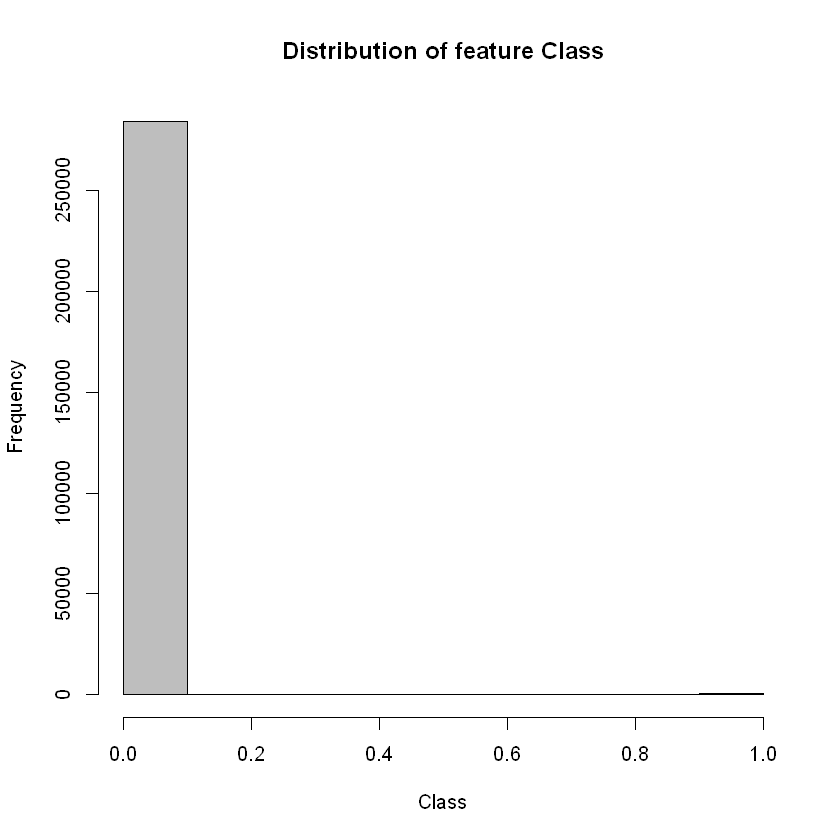

In [9]:
hist(dataName$Class, breaks=10, col="gray", xlab="Class", main="Distribution of feature Class") 

The distribution of feature Class above is highly imbalanced! As discussed in previous section, the total number of value 0 (non-fraudulent) outnumbered the total number of value 1 (fraudulent). Fraudulent transactions account for 0.172% of the data which is basically negligible as can be illustrated (well it cannot be seen literally as expected) from the plot.

It is very important to restructure imbalanced datasets since it reduces the accuracy of machine learning algorithm. There are a lot of methods to restructure imbalanced datasets to balanced datasets. However, we will not implement the methods to deal with imbalanced datasets in this assignment.

The second feature that we can explore is Amount, and this will be extremely long tail since a lot of transactions in our dataset are containing low values. To validate, we can use hist function below.

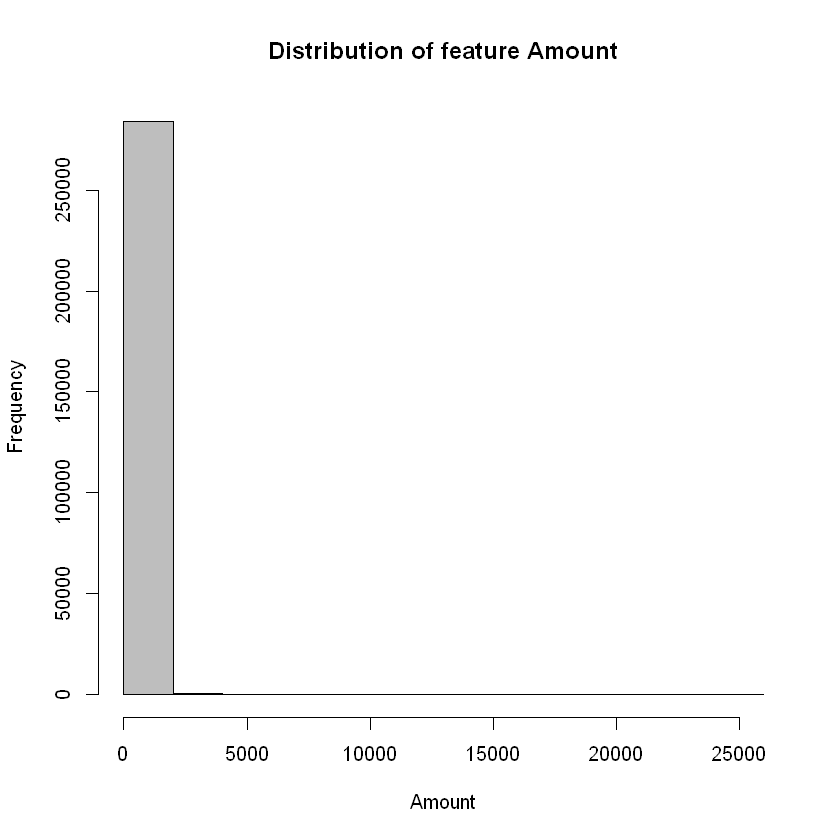

In [10]:
hist(dataName$Amount, breaks=10, col="gray", xlab="Amount", main="Distribution of feature Amount") 

The histogram for feature Amount does not make sense now. It only shows that a lot of transactions are around zero region however it does not clearly specify how long tail it is.

Furthermore, we can produce another histogram for feature Amount based on logarithm, log10.

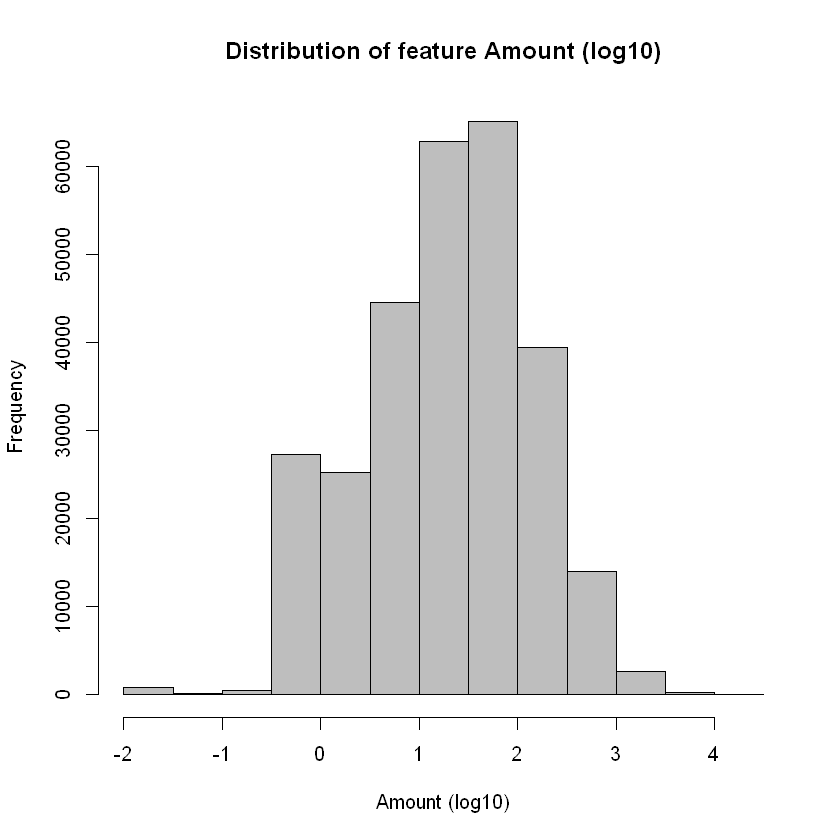

In [11]:
hist(log10(dataName$Amount), breaks=10, col="gray", xlab="Amount (log10)", main="Distribution of feature Amount (log10)") 

Using log10 to plot a histogram produces a curve as shown above. After the log transformation, the distribution appears to be normal. Remember that on the un-logged scale, the frequency or y-axis represents the count of each Amount value. However, in this log transformation, the logarithmic axis compresses the range in a non-linear way which causes this new plot to represent a density and not a count. Hence, the log scale is usually inappropriate for histograms.

In order to find out how long tail it is, we need to split the Amount data by initially slicing around zero region.

In [12]:
length(dataName$Amount[dataName$Amount < 5])/length(dataName$Amount) * 100

[1] 23.68727

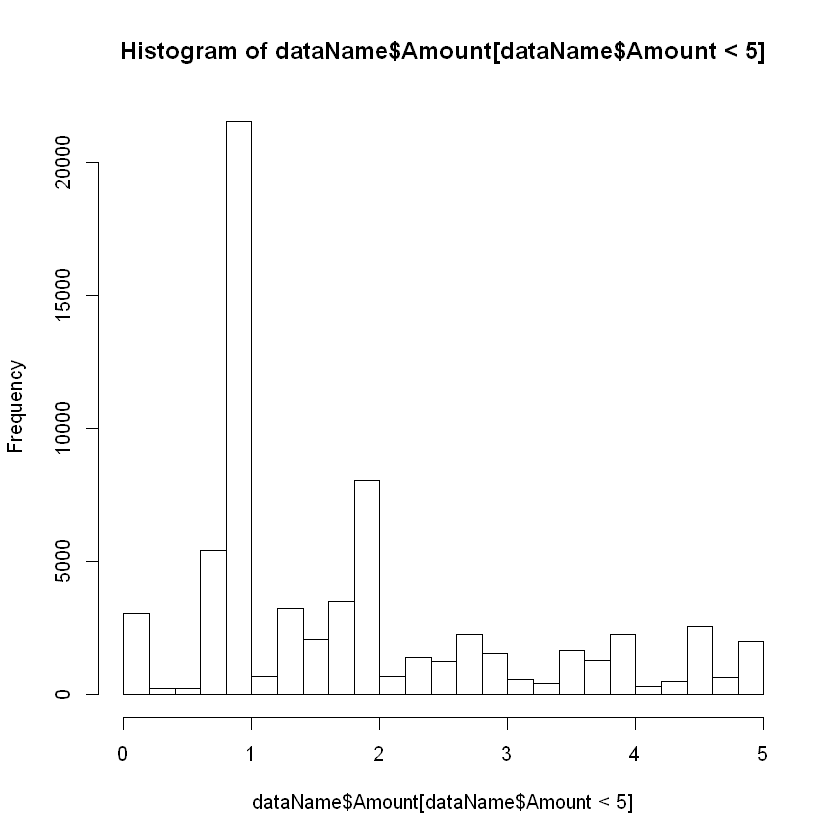

In [13]:
hist(dataName$Amount[dataName$Amount < 5])

By slicing the Amount < 5, we can only see 23.68% of the data. We want to see how long tail the data is with almost all the data so we need to increase the value for slicing. 

We could try Amount < 50, 100, and 300.

In [14]:
length(dataName$Amount[dataName$Amount < 50])/length(dataName$Amount) * 100

[1] 66.60791

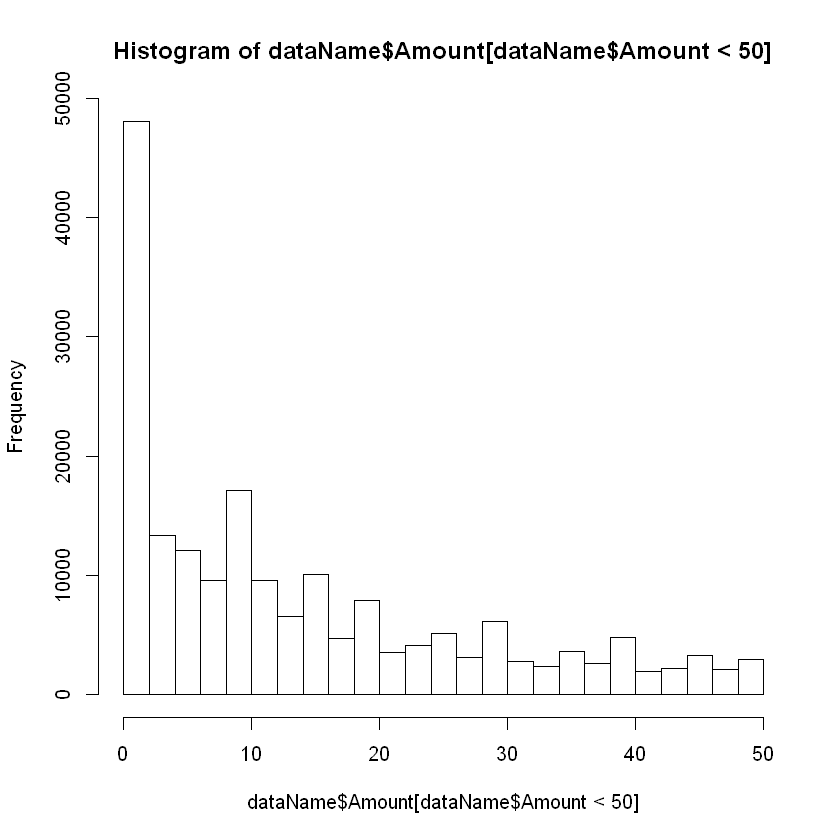

In [15]:
hist(dataName$Amount[dataName$Amount < 50])

In [16]:
length(dataName$Amount[dataName$Amount < 100])/length(dataName$Amount) * 100

[1] 79.85127

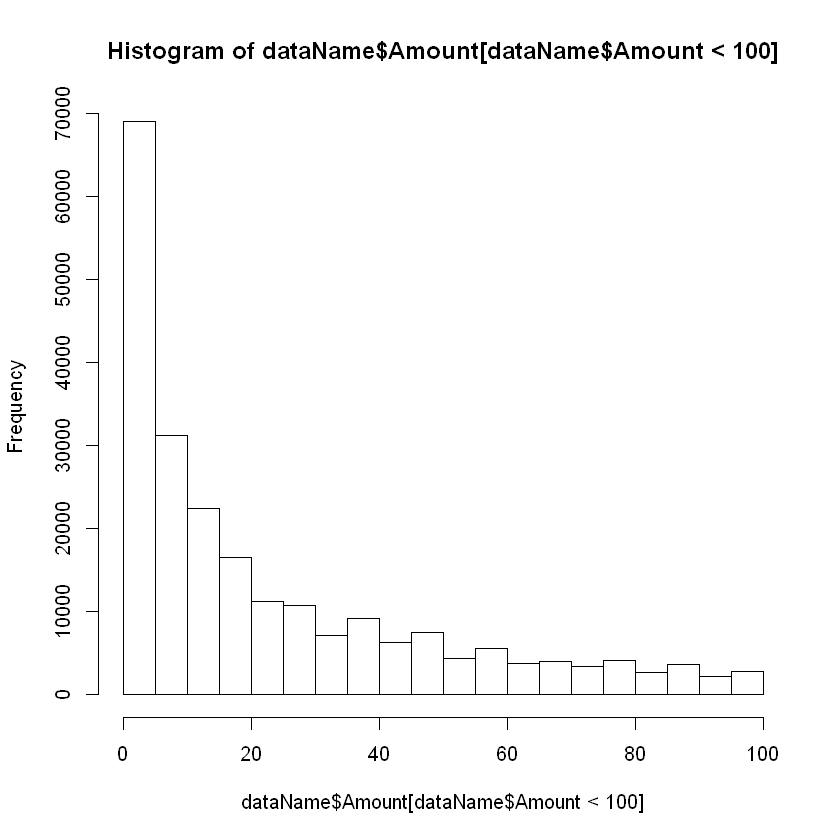

In [17]:
hist(dataName$Amount[dataName$Amount < 100])

In [18]:
length(dataName$Amount[dataName$Amount < 300])/length(dataName$Amount) * 100

[1] 93.57846

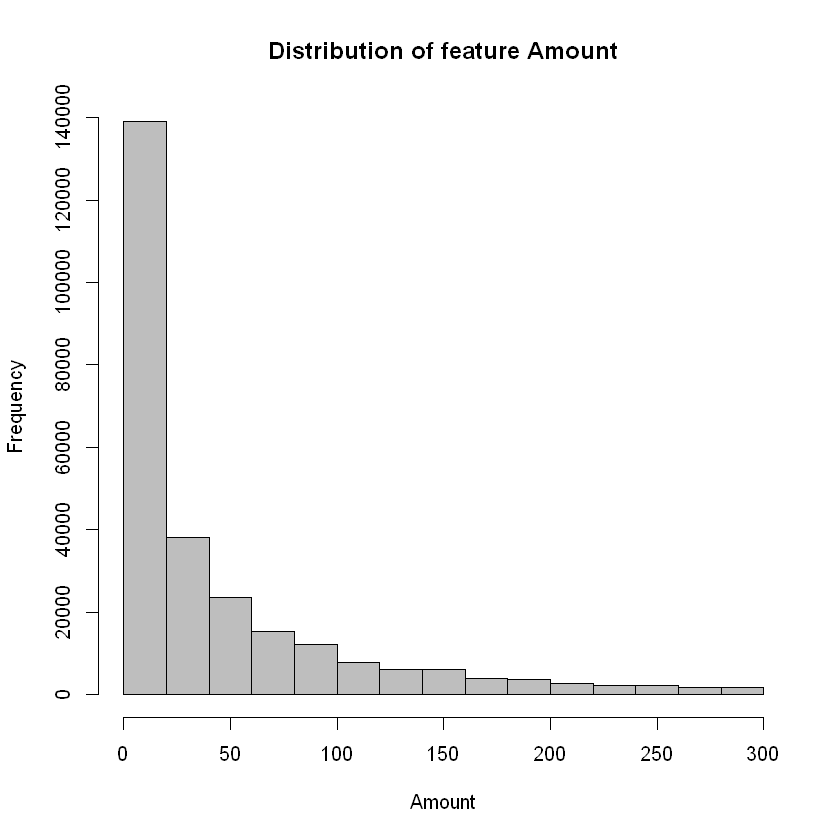

In [19]:
hist(dataName$Amount[dataName$Amount < 300], col="gray", xlab="Amount", main="Distribution of feature Amount") 

Until this point that we cover 93% of the data, we begin to see long tail with the dataset. Also notice that if we keep on increasing the value for slice, the percentage is not increasing as much as it used to.

We can see from the histogram above that the bin size is 20. It means that the Amount values of 0-20 has the highest frequency of transactions which is somewhat 130000 transactions.

We can also explore another feature variable, Time. Let's see the histogram of Time below.

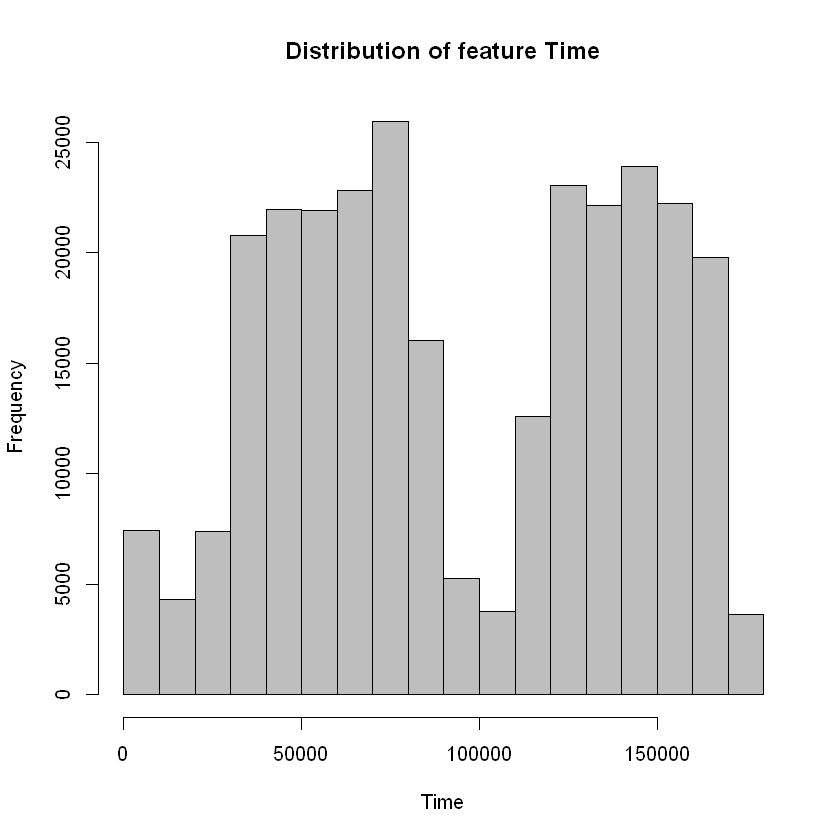

In [20]:
hist(dataName$Time, breaks=15, col="gray", xlab="Time", main="Distribution of feature Time") 

Remember that the feature Time is the the seconds elapsed between each transaction and the first transaction in the dataset. And the distribution does not clearly show us explicitly how the feature Time functions. This gives us an idea that Time and Amount are not linked to each other very well.

To validate that idea, we can use bi-variate analysis using correlation function.

In [21]:
cor(dataName$Time, dataName$Amount)

[1] -0.01059637

Notice that it has almost negligible correlation with negative sign. The negative sign only means that as the Time decreases, the Amount increases. However, the value is negligible enough. Hence, we can somehow conclude that there is no correlation between Time and Amount.

Since this data is for classification problem, obviously, we cannot do any bi-variate analysis using Time or Amount as predictor variable and Class as the one to be predicted. The target variable Class is not continous and has values 0 and 1 as shown in the scatter plot below. Hence, we cannot conduct linear regression and add the regression line to the plot.

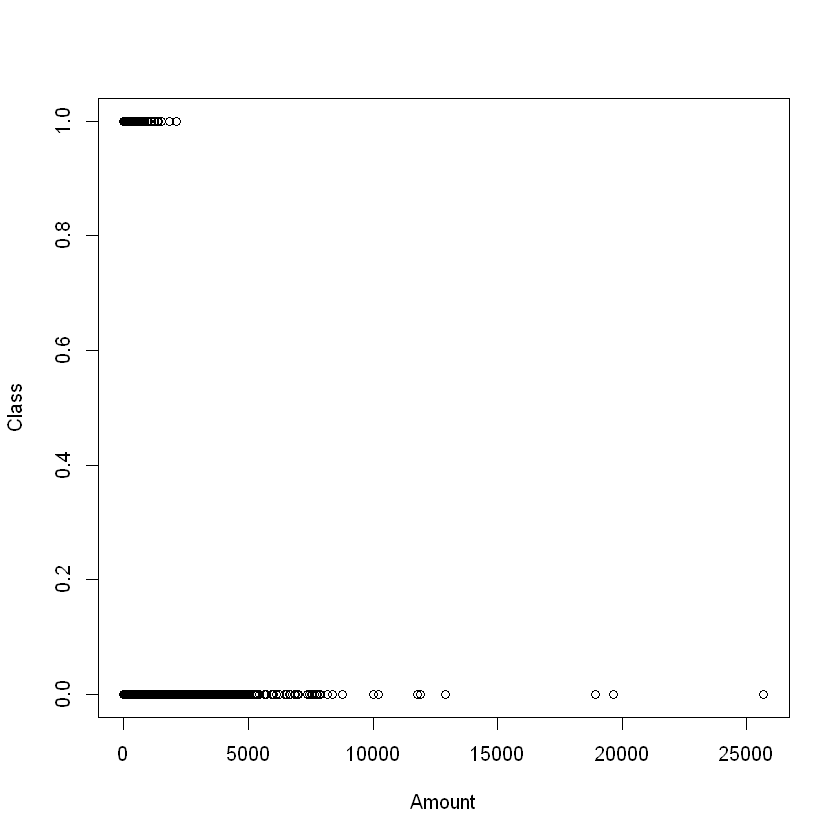

In [22]:
plot(dataName$Amount, dataName$Class, xlab='Amount', ylab='Class')

However, through multivariate analysis, we can show the correlation of principal components (V1-V28) and the target variable Class. Using cor function with the entire dataframe, cor(dataName), it will output a correlation matrix showing a pairwise correlation for each variable to each variable. With 31 variables at hand, it will be hard to comprehend those numbers. To make it more intuitive and able to visualize it, we can use the package and function corrplot.

In [25]:
library('corrplot')

corrplot 0.84 loaded


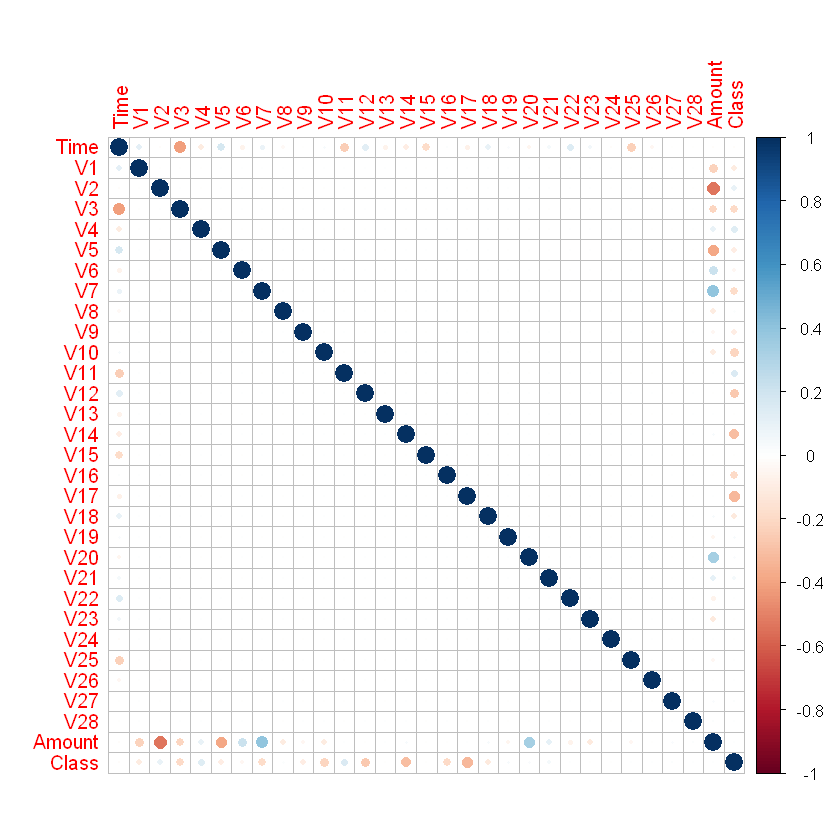

In [26]:
multiVarMatrix <- cor(dataName)
corrplot(multiVarMatrix, method = "circle")

As you can see from the plot, principal components within principal components do not have strong correlations between them. However, these principal components have strong correlation with the Class variable as shown by circles. The larger the size of the circles, the stronger the correlation. The color of the circles represents the polarity of the correlation as shown in the legend bar at the right side.

### **Discussion:**

The Kaggle data is of good quality and has enough number of observations, 284807. However, it is highly imbalanced as expected in this kind of dataset, credit card transactions. In order to improve the accuracy of the machine learning model, we have to restructure first the dataset to make it a balanced dataset. There is a lot of [methods or techniques](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-deal-imbalanced-classification-problems/) to explore to do it like undersampling, oversampling, synthetic data generation, and cost sensitive learning.  

Log transformation is not a good practice to use in histogram since it gives us a false perception of the density as frequency or count. Another potential issue will be the impact of the transformation to the zero value of the original data since it can generate data that falls outside the bounds of the original data. What does it mean to have impossible values on the x-axis?

Through multivariate analysis and correlation plot (corrplot), we learned that there is indeed correlation of principal components to fraudulence of credit card. We can also extend this study and explore, in particular, the correlation of princial components V1 - V17 individually to the target variable Class, and the correlation of principal components of V1 - V7 individually to the feature Amount.

With this data, we can eliminate or at least reduce credit card fraudulence. We can help cut down the credit card fraud losses for the coming years. However, it is also important to have an effective model so it can identify fraud accurately in time when a criminal uses a stolen card to consume.

We can use an effective machine learning model to be trained with these features of this dataset. We can have random forests as a model since it has relatively high preditive accuracy but has a slow training rate due to sophisticated algorithm. Since we are dealing with classification problem, logistic regression is also suitable for modeling. The advantage of logistic regression is fast training speed but it has a lower predictive accuracy compared to random forests algorithm.